# Homework 1
### Realizado por: Sergio Duque Mejía, c.c: 1036654435

In [1]:
# Libraries
import numpy as np
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [2]:
# Descarga de libro.
contents = urlopen("https://www.gutenberg.org/files/76/76-0.txt").read().decode('utf-8')
print(type(contents))

<class 'str'>


In [3]:
# Capitulos del libro.
chapters = ["CHAPTER I.\r","CHAPTER II.\r","CHAPTER III.\r","CHAPTER IV.\r","CHAPTER V.\r","CHAPTER VI.\r","CHAPTER VII.\r","CHAPTER VIII.\r","CHAPTER IX.\r","CHAPTER X.\r",
            "CHAPTER XI.\r","CHAPTER XII.\r","CHAPTER XIII.\r","CHAPTER XIV.\r","CHAPTER XV.\r","CHAPTER XVI.\r","CHAPTER XVII.\r","CHAPTER XVIII.\r","CHAPTER XIX.\r","CHAPTER XX.\r",
            "CHAPTER XXI.\r","CHAPTER XXII.\r","CHAPTER XXIII.\r","CHAPTER XXIV.\r","CHAPTER XXV.\r","CHAPTER XXVI.\r","CHAPTER XXVII.\r","CHAPTER XXVIII.\r","CHAPTER XXIX.\r","CHAPTER XXX.\r",
            "CHAPTER XXXI.\r","CHAPTER XXXII.\r","CHAPTER XXXIII.\r","CHAPTER XXXIV.\r","CHAPTER XXXV.\r","CHAPTER XXXVI.\r","CHAPTER XXXVII.\r","CHAPTER XXXVIII.\r","CHAPTER XXXIX.\r","CHAPTER XL.\r",
            "CHAPTER XLI.\r","CHAPTER XLII.\r","CHAPTER THE LAST\r","THE END. YOURS TRULY, _HUCK FINN_.\r"]

In [4]:
# Separa todo el texto basado en salto de linea ("\n"), cada dato es un renglon.
datalist = contents.split("\n")

In [5]:
# Imprimimos cada renglon del texto.
for i in datalist:
    print(i)

The Project Gutenberg eBook of Adventures of Huckleberry Finn, by Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Adventures of Huckleberry Finn

Author: Mark Twain (Samuel Clemens)

Release Date: August, 1993 [eBook #76]
[Most recently updated: February 21, 2021]

Language: English

Character set encoding: UTF-8

Produced by: David Widger

*** START OF THE PROJECT GUTENBERG EBOOK HUCKLEBERRY FINN ***




ADVENTURES

OF

HUCKLEBERRY FINN

(Tom Sawyer's Comrade)

By Mark Twain

Complete




CONTENTS.

CHAPTER I. Civilizing Huck.--Miss Watson.--Tom Sawyer Waits.



In [33]:
ch_text = [] # lista que permite guardar cada capitulo del texto
try:
    for i in range(len(chapters)): # en el rango de cada capitulo se hace un bucle.
        ch_text.append(datalist[datalist.index(chapters[i]):datalist.index(chapters[i+1])]) # se define con .index la posicion en que aparece el chapter, por lo que
        # permite extraer por ejemplo desde chapter 1 hasta chapter 2, esto seria todo el texto de chapter 1.
except (IndexError): # Se usa esto por que aparece un error de indice debido a que se toma los chapters desde 0-43, pero la lista de capitulos contine 44 strings, tal que este ultimo es el final
    # del capitulo final.
    pass


In [7]:
try: 
    while True:
        for i in ch_text:
            i.remove('\r') # Se elimina a cada renglon el (\r) que aparece al final de este.
except ValueError: # evita errores a los renglones que no incluya.
    pass

In [8]:
def count_names(name): # Funcion que cuenta los nombres.
    ch_count = [] # lista que cuenta cuantas veces aparece un nombre por capitulo.
    for i in range(len(ch_text)):
        temp = [] # almacena una lista de cada busqueda para luego sumarse. 
        for j in ch_text[i]:
            low = j.lower() # para buscar los nombres se convierte en minusculas.
            low = low.split('\r')[0] # se separa de los (\r)
            temp.append(low.count(name)) # se almacena las coincidencias.
            
        ch_count.append(sum(temp)) # sumamos todas las coincidencias para tener el total de veces que se repite.
    return ch_count

In [34]:
names = ['tom','jim','huck'] # listado de nombres a buscar.

In [37]:
data_names = [] # conteo de nombres por capitulos.
for i in names:
    data_names.append(count_names(i)) # se almacena los nombres.

In [11]:
chp = []
for i in chapters:
    tm = i.replace(' ','_') # limpiamos el listado de chapters para que sean sin espacios.
    tm = tm.replace('.','') # se elimina los puntos.
    tm = tm.lower() # se cambian a minusculas.
    chp.append(tm.split('\r')[0]) # se separa los (\r) pero se toma el primer dato que es el nombre del capitulo, ejemplo: ["chapter_i",""] --> "chapter_i"
chp = chp[:-1] # elimina el utimo valor que no es un capitulo.

In [44]:
dataset = pd.DataFrame(data=data_names,columns=chp) # construimos el dataframe
dataset.insert(0,'name',[ i.capitalize() for i in names ]) # insertamos en la primera posicion los nombres capitalizados.


In [46]:
dataset.head() # se muestra los capitulos con sus datos respectivamente.

,name,chapter_i,chapter_ii,chapter_iii,chapter_iv,chapter_v,chapter_vi,chapter_vii,chapter_viii,chapter_ix,...,chapter_xxxiv,chapter_xxxv,chapter_xxxvi,chapter_xxxvii,chapter_xxxviii,chapter_xxxix,chapter_xl,chapter_xli,chapter_xlii,chapter_the_last
0,Tom,6,24,5,1,0,2,5,2,1,...,15,18,19,11,32,12,11,9,32,6
1,Jim,0,16,0,8,0,0,0,22,11,...,17,18,24,4,27,10,13,0,12,6
2,Huck,3,2,3,1,0,2,0,6,1,...,6,9,2,0,3,1,3,1,2,3


In [14]:
dataset.to_csv('characters_count.csv',index=None) # Almacenamos los datos en un archivo externo con formato .csv

In [47]:
d = pd.read_csv('characters_count.csv') # Leemos los archivos csv.

In [25]:
def sumCum(data): # Funcion que permite hacer una suma acumulativa de los datos en el dataset
    rst = [] # almacena los datos acumulativos
    for i in range(3):
        arr_temp = d.loc[i].to_numpy()[1:] # toma las filas correspondientes a cada nombre.
        rst.append(np.cumsum(arr_temp)) # hace la suma acumulativa y lo guarda en rst.
    return rst

In [48]:
cumulative = sumCum(d) # almacena todos los datos acumulativos en una lista.

In [60]:
def graph(data,label): # funcion que grafica los datos acumulativos.
    plt.figure(figsize=(10,8)) # tamaño del grafico
    for i in range(len(data)):
        plt.plot(range(len(data[i])),data[i],label=label[i]) # plot de linea
        plt.plot(range(len(data[i])),data[i],".") # plot de puntos

    plt.grid() # grid
    plt.legend() # legenda asociada al label
    plt.show() # show grafico

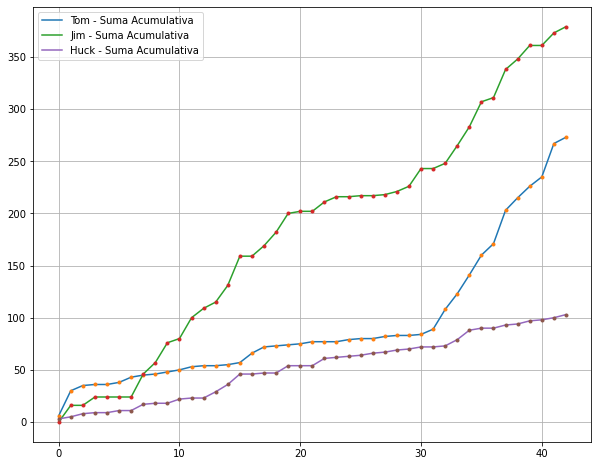

In [61]:
# en label se almacena los nombres en mayusculas y se le suma un string " - Suma Acumulativa"
graph(cumulative,[ names[i].capitalize() +" - Suma Acumulativa" for i in range(len(names)) ])

### Conclusion
Se observa que Jim fue el personaje mas nombrado en el libro, y huck fue el menos nombrado a pesar de que es el nombre principal del libro.